In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('house_price_dống-da.xlsx')
df.head()

/home/longdp/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

- Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
- Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
- Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,
- Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
- Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ
- Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR
- Thực hiện loại bỏ các dòng dữ liệu ngoại lai
- Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

In [4]:
#Drop every rows with na in price col
df.dropna(subset=['price'], inplace=True)
df.info()
df[df.isna()['price'] == True]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              944 non-null    object        
 1   address            944 non-null    object        
 2   area               942 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           944 non-null    datetime64[ns]
 5   land_certificate   683 non-null    object        
 6   house_direction    43 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             548 non-null    float64       
 9   bedroom            631 non-null    float64       
 10  floor              367 non-null    float64       
 11  type_of_land       944 non-null    object        
 12  street_name        791 non-null    object        
 13  ward_name          788 non-null    object        
 14  district_n

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long


In [5]:
#Handle missing data
house_direction_mode = df['house_direction'].mode()[0]
balcony_direction_mode = df['balcony_direction'].mode()[0]
toilet_mode = df['toilet'].mode()[0]
bedroom_mode = df['bedroom'].mode()[0]
floor_mode = df['floor'].mode()[0]

# print(f'house_direction_mode:  {house_direction_mode}')
# print(f'balcony_direction_mode:  {balcony_direction_mode}')
# print(f'toilet_mode:  {toilet_mode}')
# print(f'bedroom_mode:  {bedroom_mode}')
# print(f'floor_mode:  {floor_mode}')

values = {
    'land_certificate': 'No information',
    'house_direction': house_direction_mode,
    'balcony_direction': balcony_direction_mode,
    'toilet': toilet_mode,
    'bedroom': bedroom_mode,
    'floor': floor_mode,
}

df.fillna(value=values, inplace=True)
df.info()
# df[df['land_certificate'] == 'No information']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              944 non-null    object        
 1   address            944 non-null    object        
 2   area               942 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           944 non-null    datetime64[ns]
 5   land_certificate   944 non-null    object        
 6   house_direction    944 non-null    object        
 7   balcony_direction  944 non-null    object        
 8   toilet             944 non-null    float64       
 9   bedroom            944 non-null    float64       
 10  floor              944 non-null    float64       
 11  type_of_land       944 non-null    object        
 12  street_name        791 non-null    object        
 13  ward_name          788 non-null    object        
 14  district_n

In [6]:
#Handle house inside alley
search = 'ngõ'
df_alley = df[(df['title'].str.contains(search) == True) | (df['address'].str.contains(search) == True)]
df_alley.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
7,Bán nhà phường Thổ Quan ngõ thoáng 26m2 x 4 tầ...,"Đường Trung Phụng, Phường Thổ Quan, Đống Đa, ...",26.0,2900.0,2021-04-06,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,3.0,4.0,Bán nhà riêng\n,Đường Trung Phụng,Phường Trung Phụng,Quận Đống Đa,Thành phố Hà Nội,21.014325,105.834918
12,Bán đất tặng nhà gần ngõ 34 Hoàng Cầu - 29 Lán...,"174, Phố Mai Anh Tuấn, Phường Ô Chợ Dừa, Đốn...",52.2,5376.6,2021-04-06,Sổ đỏ,Tây-Bắc,Tây-Bắc,1.0,2.0,3.0,Bán nhà riêng\n,Phố Mai Anh Tuấn,Phường Ô Chợ Dừa,Quận Đống Đa,Thành phố Hà Nội,21.019078,105.819259
16,Chính chủ bán Căn nhà Tâp Thể Đường Sắt ngõ 29...,"Láng Hạ, Phường Láng Hạ, Quận Đống Đa, Hà Nội",100.0,2400.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,2.0,3.0,5.0,"Tập thể, cư xá",Phố Láng Hạ,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.017006,105.815086
17,Siêu hot! Bán nhà tập thể ngõ 62 Nguyên Chí Th...,"Nguyễn Chí Thanh, Phường Láng Thượng, Quận Đốn...",70.0,2000.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,1.0,2.0,5.0,"Tập thể, cư xá",Đường Nguyễn Chí Thanh,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.021098,105.808791


In [7]:
#Caculate price/m2 for alley houses
print(f"Price per m2 for house inside alley is:  {df_alley['price'].sum()/df_alley['area'].sum()}")

Price per m2 for house inside alley is:  116.43738508340856


<AxesSubplot:xlabel='area'>

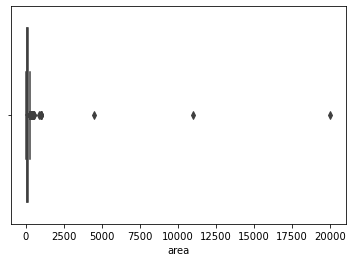

In [8]:
#Handle outliners
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['area'])

<AxesSubplot:xlabel='price'>

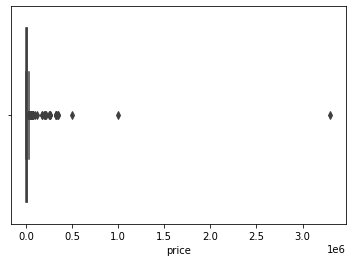

In [9]:
sns.boxplot(x=df['price'])

Text(0, 0.5, 'Price')

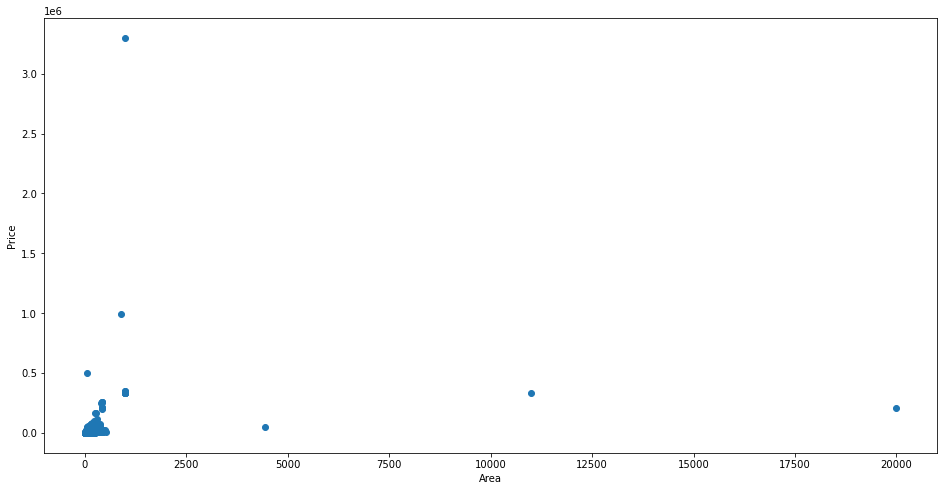

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x=df['area'], y=df['price'])
ax.set_xlabel('Area')
ax.set_ylabel('Price')

In [11]:
Q1 = df[['area', 'price']].quantile(0.25)
Q3 = df[['area', 'price']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

area        83.0
price    11850.0
dtype: float64


In [26]:
df_clean = df[~((df[['area', 'price']] < (Q1 - 1.5 * IQR) | (df[['area', 'price']] > (Q3 + 1.5 * IQR)))).any(axis=1)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              928 non-null    object        
 1   address            928 non-null    object        
 2   area               926 non-null    float64       
 3   price              928 non-null    float64       
 4   postDate           928 non-null    datetime64[ns]
 5   land_certificate   928 non-null    object        
 6   house_direction    928 non-null    object        
 7   balcony_direction  928 non-null    object        
 8   toilet             928 non-null    float64       
 9   bedroom            928 non-null    float64       
 10  floor              928 non-null    float64       
 11  type_of_land       928 non-null    object        
 12  street_name        791 non-null    object        
 13  ward_name          788 non-null    object        
 14  district_n

Text(0, 0.5, 'Price')

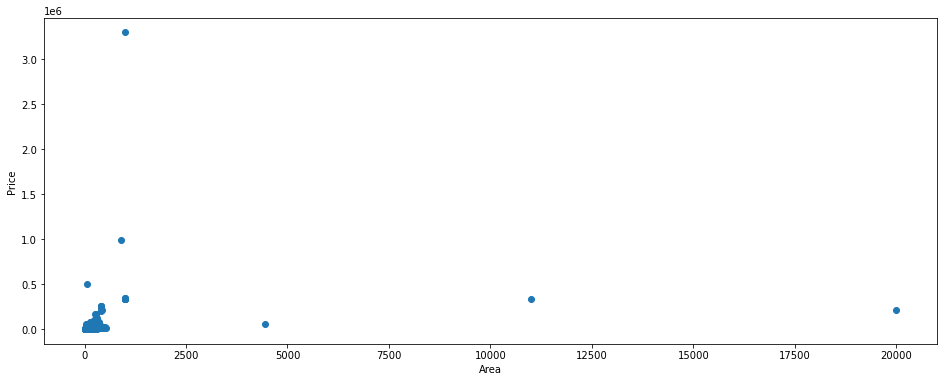

In [35]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x=df_clean['area'], y=df_clean['price'])
ax.set_xlabel('Area')
ax.set_ylabel('Price')

In [36]:
df_clean[df_clean['area'] > 2500]

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
183,Bán nhà MP Xã Đàn 44.5m2 x 6 tầng MT 6.6m vỉa ...,Hà Nội\nQuận Đống Đa,4450.0,50000.0,2021-01-01,No information,Đông-Nam,Đông-Nam,4.0,4.0,5.0,Bán nhà mặt phố,NaN,NaN,Quận Đống Đa,Thành phố Hà Nội,21.018072,105.829949
728,"Nhà mặt phố Phạm Ngọc Thach, 1100m2, mt 25m gi...","Đường Phạm Ngọc Thạch, Phường Kim Liên, Đống Đ...",11000.0,330000.0,2021-05-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,4.0,1.0,Bán nhà mặt phố\n,Đường Phạm Ngọc Thạch,Phường Kim Liên,Quận Đống Đa,Thành phố Hà Nội,21.011113,105.836969
739,Cần bán gấp toà nhà Vip bậc nhất mặt phố thươn...,"Thái Hà, Phường Trung Liệt, Quận Đống Đa, Hà Nội",20000.0,210000.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,5.0,5.0,5.0,Bán nhà mặt phố,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.012988,105.820012
